# Implementasi Decision Tree

In [1]:
import pandas as pd
# untuk menghilangkan warning
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

## Mempersiapkan data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nurulfirdausy/Penambangan-Data/master/IRIS.csv')

Memisahkan baris species

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

Memisahkan data training dan data testing

In [4]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Mempersiapkan model decision tree

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
d3 = DecisionTreeClassifier()
d3.fit(X_train, y_train)

DecisionTreeClassifier()

Memvisualisasikan model

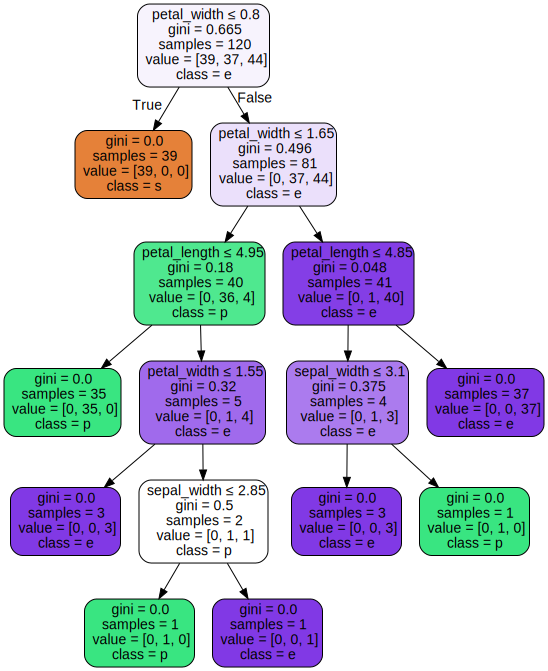

In [6]:
import graphviz 
dot_data =export_graphviz(d3, out_file=None, feature_names=data.columns[:-1], class_names=data.columns[-1],  filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

## Test prediksi model

In [7]:
y_predic = d3.predict(X_test)
y_predic

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data_predic = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_predic, columns=["Predict"]).reset_index(drop=True)], axis=1)
data_predic

,species,Predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [9]:
correct = data_predic.loc[data_predic["species"] == data_predic["Predict"]]

In [10]:
from sklearn.metrics import accuracy_score
print(f'acuraty = {"{:,.2f}".format(accuracy_score(y_test, y_predic)*100)}%')
print(f'dari data prediksi {correct.shape[0]} / {data_predic.shape[0]} * 100% = {"{:,.2f}".format((correct.shape[0]) / (data_predic.shape[0]) * 100)}%' )

acuraty = 96.67%
dari data prediksi 29 / 30 * 100% = 96.67%
